---

### Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

---

# Data cleaning

Seeing that we are not including our scripts for cleaning the data, we can at least provide a quick overview how we cleaned it. We made 2 scripts -  ``data_cleaning.py`` and ``crime_grouping.py``.
The scripts were a combination of the various methods used when doing the exercises.

- ``data_cleaning.py`` : 
    - standardized datetime and removed possible duplicates for year 2018 that might have occured when merging the two data sets
    - standardize police districts
    - merged all data into one dataset that would span reported crimes from 2003 to 2018 


In [7]:
data = pd.read_csv('../data/clean-data/sf_clean_data.csv')
data.head()

,Incident Number,Incident Datetime,Incident Category,Incident Description,Police District,Resolution,Latitude,Longitude,Incident Day of Week,Year
0,160204156,2016-03-03 19:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Taraval,NONE,37.707968,-122.463545,Thursday,2016
1,130119109,2013-02-10 18:09:00,ASSAULT,BATTERY,Mission,NONE,37.754222,-122.425237,Sunday,2013
2,61026720,2006-09-25 22:15:00,ASSAULT,BATTERY,Northern,NONE,37.778486,-122.425839,Monday,2006
3,110493133,2011-06-19 13:06:00,TRESPASS,TRESPASSING,Taraval,NONE,37.729185,-122.466758,Sunday,2011
4,80749068,2008-05-23 12:10:00,ASSAULT,BATTERY,Northern,NONE,37.775904,-122.423582,Friday,2008


- ``crime_grouping.py`` :
    - in this script we would assign ``Focus Group`` column which will be used for analysis through the entirety of this assignment
    - The groups are as follows:
    
    | Focus Group | Specific Crime Types |
    | :--- | :--- |
    | **Violent Crime** | Assault, Robbery, Kidnapping, Homicide, Extortion |
    | **Sex Offenses** | Sex offenses (forcible/non-forcible), Rape, Human trafficking (commercial/involuntary) |
    | **Property Crime** | Vehicle theft, Larceny/Theft, Burglary, Arson, Vandalism, Malicious mischief, Stolen property, Recovered/Impounded vehicle, Trespass, Bad checks |
    | **Financial Crime** | Fraud, Forgery/Counterfeiting, Embezzlement, Bribery |
    | **Drug & Alcohol** | Drug/Narcotic, Drug violations, DUI, Drunkenness, Liquor laws |
    | **Weapons** | Weapon laws, Weapons offenses, Weapons carrying |
    | **Public Order** | Disorderly conduct, Loitering, Prostitution, Gambling, Pornography/Obscene mat, Civil sidewalks, TREA, Offenses against family/children |
    | **Administrative** | Warrants, Secondary codes, Traffic violations/collisions, Case closure, Courtesy/Fire reports |
    | **Non-Criminal** | Non-criminal, Missing person, Lost property, Suicide, Recovered vehicle |
    | **Other/Suspicious** | Other offenses, Miscellaneous investigation, Suspicious occurrence |

In [12]:
print("Example of the final grouped version of the dataset that will be used throughout the assignment:")
data = pd.read_csv('../data/clean-data/sf_clean_data_grouped.csv')
data.head()

Example of the final grouped version of the dataset that will be used throughout the assignment:


,Incident Number,Incident Datetime,Incident Category,Incident Description,Police District,Resolution,Latitude,Longitude,Incident Day of Week,Year,Focus Group
0,160204156,2016-03-03 19:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Taraval,NONE,37.707968,-122.463545,Thursday,2016,Property Crime
1,130119109,2013-02-10 18:09:00,ASSAULT,BATTERY,Mission,NONE,37.754222,-122.425237,Sunday,2013,Violent Crime
2,61026720,2006-09-25 22:15:00,ASSAULT,BATTERY,Northern,NONE,37.778486,-122.425839,Monday,2006,Violent Crime
3,110493133,2011-06-19 13:06:00,TRESPASS,TRESPASSING,Taraval,NONE,37.729185,-122.466758,Sunday,2011,Property Crime
4,80749068,2008-05-23 12:10:00,ASSAULT,BATTERY,Northern,NONE,37.775904,-122.423582,Friday,2008,Violent Crime


A dataframes of total **2071736** and **1010801** observations were analysed, spanning years from 2003-2018 and 2018-2015, respectively. <br><br>
*Note:* <br>
First observation in the new dataset is from January 2018, and historical dataset consist of observations until May 2018. This caused doubling when merging the dataset, so all observations from the historical dataset from 2018 were discarded.

----

# Assignment 1.1: Temporal Overview
Let's start by getting the big picture of how crime has changed over the full 20+ year period covered by your combined dataset.

Using your combined dataset (2003–present), plot the total number of incidents per year for each of your Personal Focus Crimes. Display at least the years 2003–2025.
Make sure your plot follows good visualization practices: labeled axes, a legend, a descriptive title.
Identify and comment on at least two notable features in the plot — for example, long-term trends, sudden drops or spikes, or the impact of COVID-19 in 2020. For each feature, offer a possible explanation.

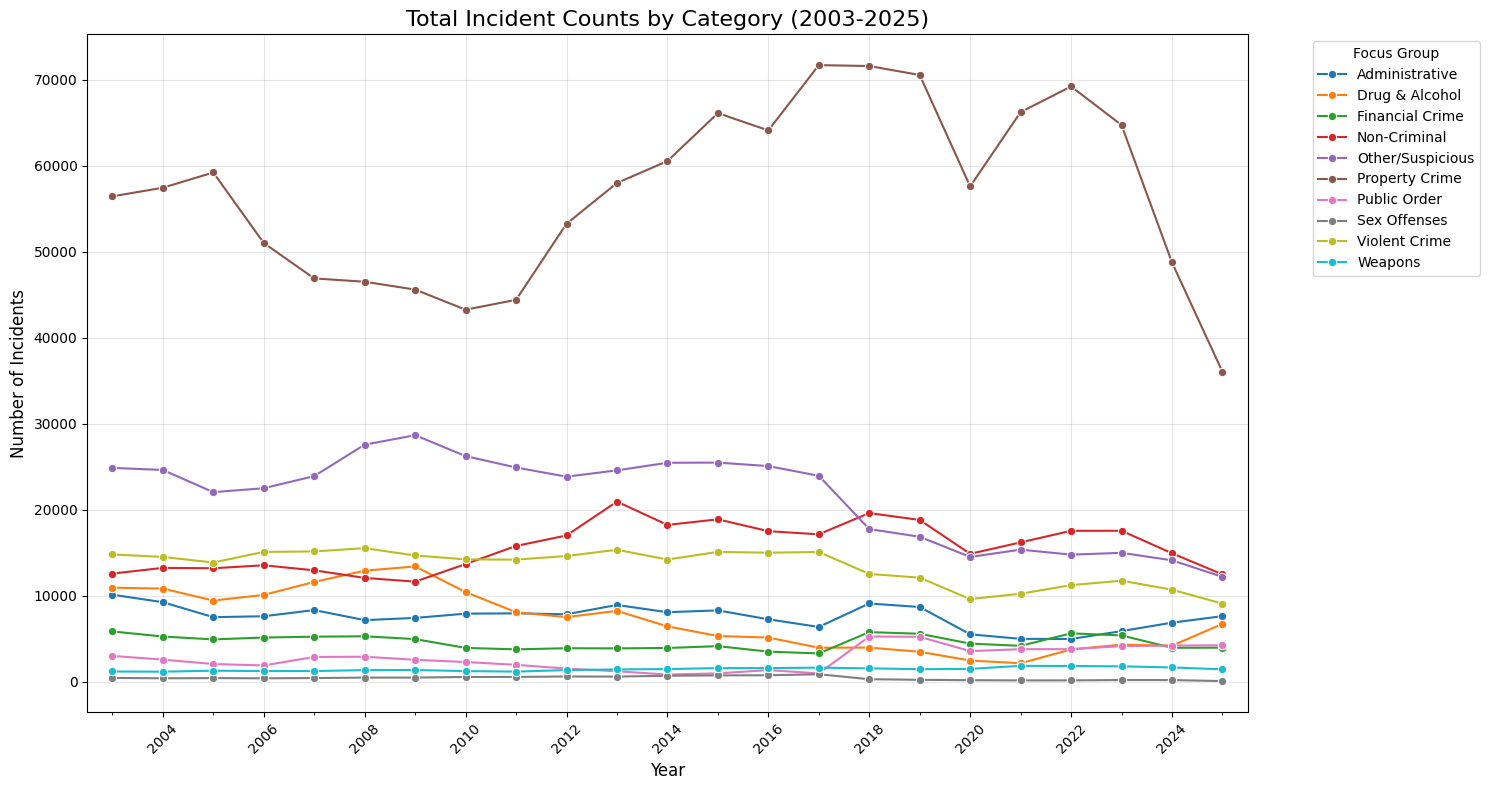

In [13]:
data = pd.read_csv("../data/clean-data/sf_clean_data_grouped.csv")
data.head()

# filter for 2003 - 2025
filtered_data = data[(data['Year'] >= 2003) & (data['Year'] <= 2025)]

# Count incidents by year and category
incident_counts = filtered_data.groupby(['Year', 'Focus Group']).size().reset_index(name='Count')

# Create the plot
plt.figure(figsize=(15, 8))

# Option 1: Line plot for all categories
sns.lineplot(data=incident_counts, x='Year', y='Count', hue='Focus Group', marker='o')
plt.title('Total Incident Counts by Category (2003-2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Set x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(2))  # Show every 2nd year
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks for every year
ax.set_xlim(2002.5, 2025.5)  # Add a little padding
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Focus Group')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Over the years 2003 until 2025, the highest rate of crime were those falling into category of Property Crimes, and so any kind of theft, vandalism, trespassing etc. It is in line with other analyses, showing that property crimes in San Francisco have higher rate than national average. 

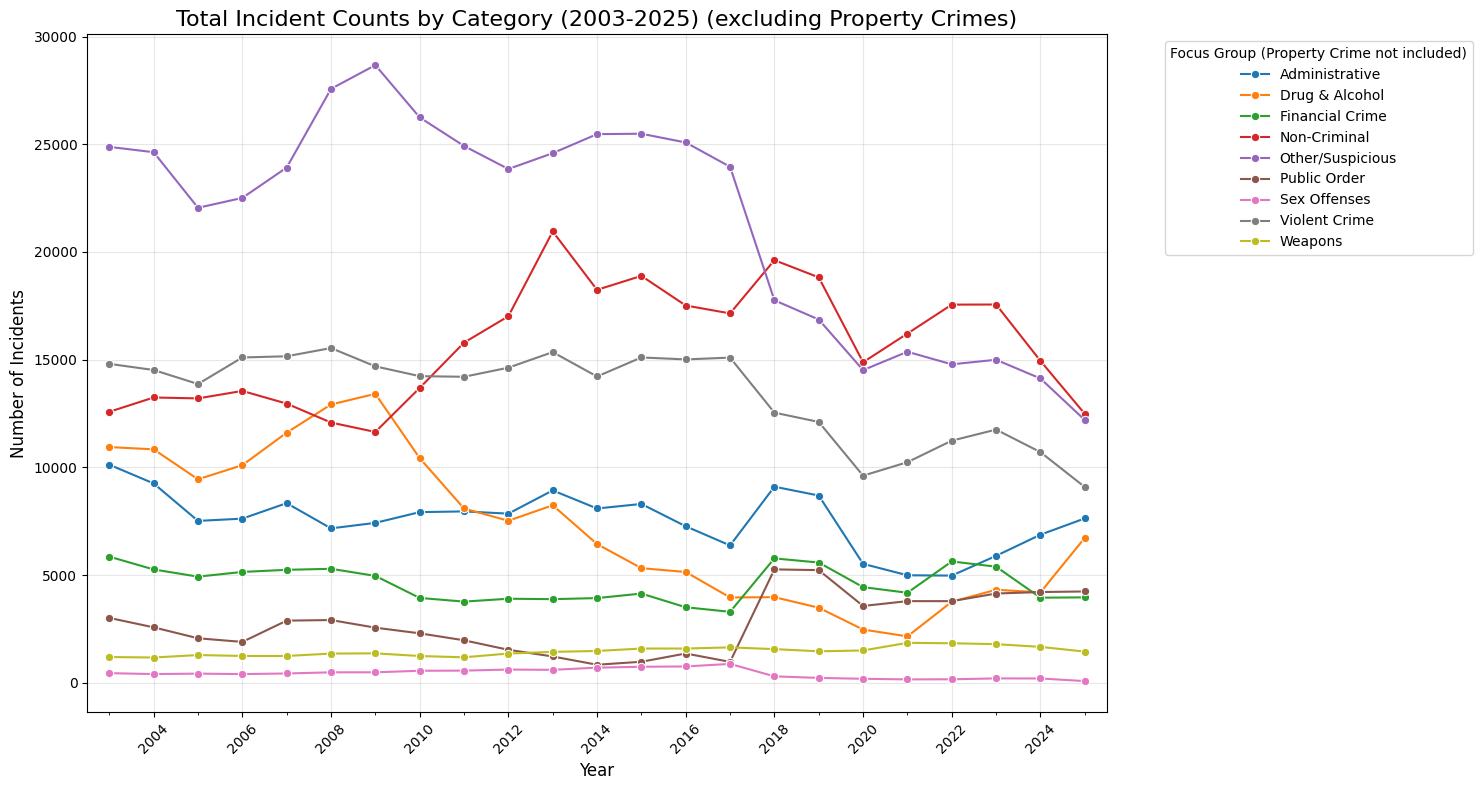

In [14]:
# Plot without Property Crime

# Count incidents by year and category
other_data = data[(data['Year'] >= 2003) & (data['Year'] <= 2025) & (data['Focus Group'] != 'Property Crime')]
other_counts = other_data.groupby(['Year', 'Focus Group']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))

# Option 1: Line plot for all categories
sns.lineplot(data=other_counts, x='Year', y='Count', hue='Focus Group', marker='o')
plt.title('Total Incident Counts by Category (2003-2025) (excluding Property Crimes)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Set x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(2))  # Show every 2nd year
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks for every year
ax.set_xlim(2002.5, 2025.5)  # Add a little padding
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Focus Group (Property Crime not included)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


``Property Crime`` category has significantly higher counts than the rest, therefore we excluded it from this plot. Until 2018, the rate of ``Non-Violent`` crimes became higher, while crimes connected to ``drugs and alcohol`` lowered. From 2009 until 2025, the rate of other or ``suspicious crimes`` lowered almost by half, this can be due to the realisation that more specific classification needed before grouping to ``'Others'``. 
<br>
After 2018 there is a general decrease in most of the crimes until 2020. This can be due to COVID-19 pandemic and quarantine. However, notable spikes in ``non-violent``, ``public order``, ``administrative and financial crimes`` can be observed. To better understand what was going on, we may look into the various types of incidents covered in these focus groups.

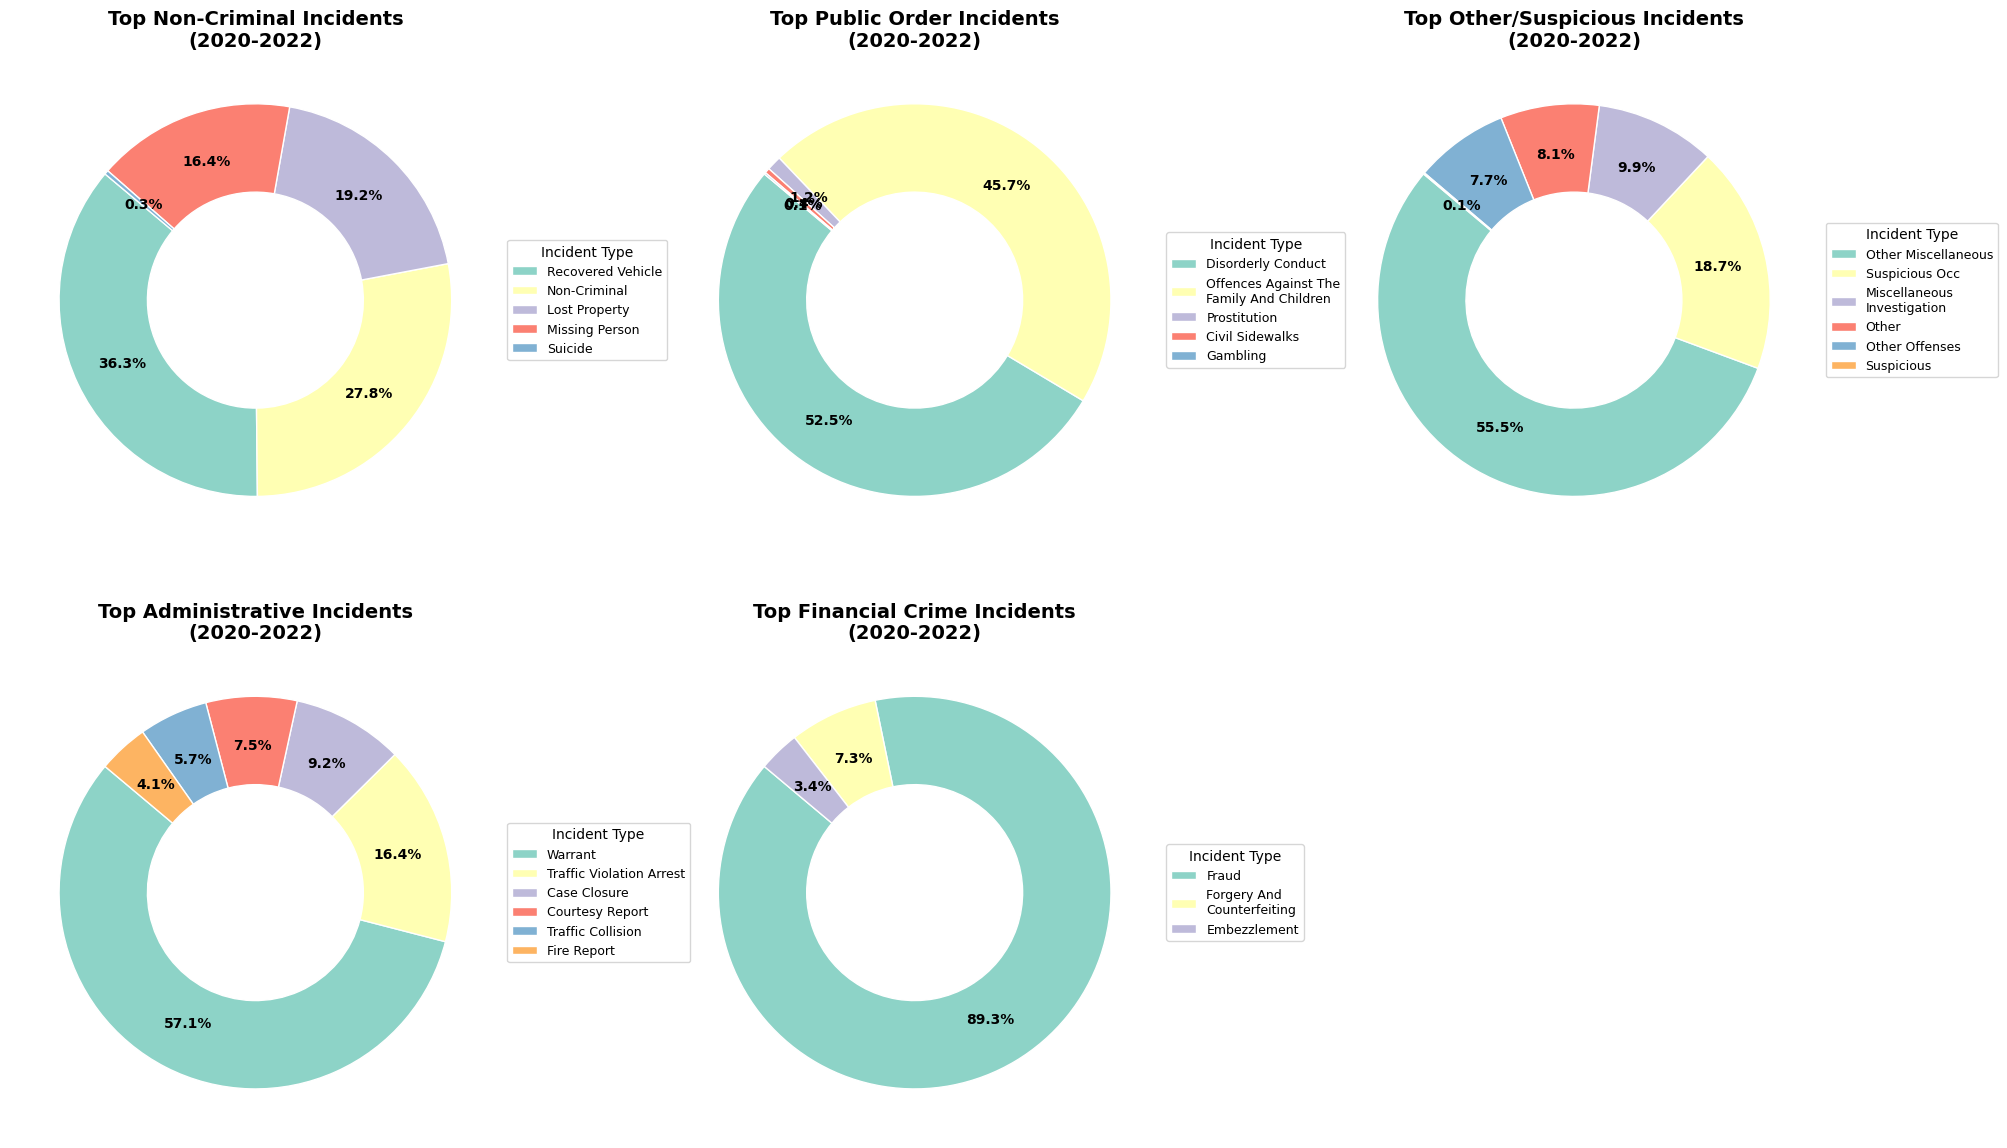

In [43]:
import matplotlib.pyplot as plt
import textwrap

covid_years = data[data['Year'].isin([2020, 2022])]

target_cats = [
    'Non-Criminal',
    'Public Order',
    'Other/Suspicious',
    'Administrative',
    'Financial Crime'
]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

colors = plt.cm.Set3.colors

for i, cat in enumerate(target_cats):

    top_desc = (
        covid_years[covid_years['Focus Group'] == cat]
        ['Incident Category']
        .value_counts()
        .head(6)
    )

    # Wrap long labels
    wrapped_labels = [textwrap.fill(label, 25) for label in top_desc.index]

    wedges, texts, autotexts = axes[i].pie(
        top_desc,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        pctdistance=0.75,
        wedgeprops={'width':0.45, 'edgecolor':'white'}
    )

    # Remove default labels
    for t in texts:
        t.set_visible(False)

    # Percentage styling
    plt.setp(autotexts, size=10, weight="bold")

    axes[i].set_title(
        f"Top {cat} Incidents\n(2020-2022)",
        fontsize=14,
        weight='bold'
    )

    # Add legend instead of labels
    axes[i].legend(
        wedges,
        wrapped_labels,
        title="Incident Type",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=9
    )

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### Fraud
Based on the visualizations, we can see that during the COVID-19 years, the majority of the recorded "spikes" were related rather to a significant shift in **administrative and fraudulent activity**. The sharp upward trend in Financial Crime starting in 2020 is almost entirely explained by Fraud, which accounts for a massive **89.3%** of the category. This aligns with the widespread "Identity Theft" and unemployment benefit scams (EDD fraud) [that occurred during the pandemic](https://www.cpmlegal.com/newsroom/news/Federal-Court-Certifies-Five-California-Classes-in-Pandemic-Unemployment-Benefits-Case-Against-Bank-of-America/).

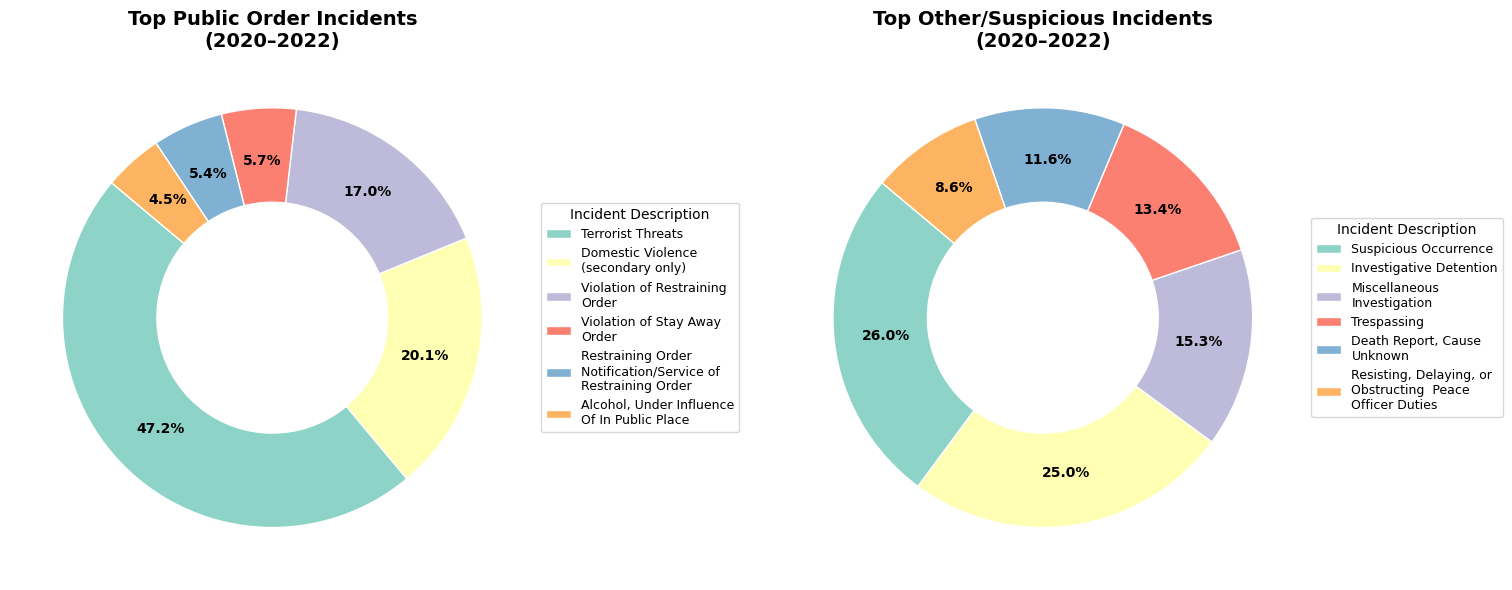

In [45]:
import matplotlib.pyplot as plt
import textwrap

# restrict to the two focus groups we want to examine
covid_years = data[data['Year'].isin([2020, 2022])]
target_cats = ['Public Order', 'Other/Suspicious']

# one row, two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes = axes.flatten()
colors = plt.cm.Set3.colors

for i, cat in enumerate(target_cats):
    top_desc = (
        covid_years[covid_years['Focus Group'] == cat]
        ['Incident Description']
        .value_counts()
        .head(6)
    )

    wrapped_labels = [textwrap.fill(label, 25) for label in top_desc.index]

    wedges, texts, autotexts = axes[i].pie(
        top_desc,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        pctdistance=0.75,
        wedgeprops={'width':0.45, 'edgecolor':'white'}
    )

    for t in texts:          # hide the default text labels
        t.set_visible(False)
    plt.setp(autotexts, size=10, weight="bold")

    axes[i].set_title(
        f"Top {cat} Incidents\n(2020–2022)",
        fontsize=14, weight='bold'
    )
    axes[i].legend(
        wedges,
        wrapped_labels,
        title="Incident Description",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=9
    )

plt.tight_layout()
plt.show()

At last ``Public Order`` and ``Other/Suspicious`` categories are more evenly distributed. The first has seen the largest amount of terrorist threats and domestic violence, while the latter labeled quarter of all cases as ``Suspicious Occurence``. 

----

---
## Assignment 1.2: Crime Profiles by Police District

Different parts of the city have very different crime patterns. Here we quantify that using conditional probabilities.

> * For each police district in your dataset, compute the **conditional crime profile**: for each of your Personal Focus Crimes, calculate
>
>   $$r(\text{crime}, \text{district}) = \frac{P(\text{crime} \mid \text{district})}{P(\text{crime})}$$
>
>   A value above 1 means that crime type is *over-represented* in that district relative to the city-wide average; below 1 means it is *under-represented*.
> * Visualize these ratios in a way that makes it easy to compare across both districts and crime types. (Simple barcharts are fine, but you may also use ideas from more complex visualization techniques, for example, a heatmap could work well here, but you're free to choose another format if you can justify it.)

### Table view
For this sub-assignment we want to focus on data from San Francisco districts - so we remove all rows where district catgeory = ``Out of Sf``

In [46]:
# We will create a pivot table of counts
counts = pd.crosstab(data['Police District'], data['Focus Group'])

# 1. Calculate P(crime | district)
# Divide each row by the sum of that row (total crimes in that district)
p_crime_given_district = counts.div(counts.sum(axis=1), axis=0)

# 2. Calculate P(crime)
# Total count of each crime divided by total number of all crimes
p_crime = counts.sum(axis=0) / counts.sum().sum()

# 3. Calculate the ratio r
# Divide the conditional probabilities by the global probabilities
crime_profile = p_crime_given_district.divide(p_crime, axis=1)
crime_profile_drop_outsf = crime_profile.drop('Out Of Sf')
crime_profile_drop_outsf

Focus Group,Administrative,Drug & Alcohol,Financial Crime,Non-Criminal,Other/Suspicious,Property Crime,Public Order,Sex Offenses,Violent Crime,Weapons
Police District,,,,,,,,,,
Bayview,1.095332,0.751436,0.724382,0.974847,1.278719,0.877185,0.797899,0.769179,1.222455,1.962585
Central,0.681410,0.379699,1.159919,0.968034,0.762155,1.253076,0.878825,0.892898,0.872417,0.611884
Ingleside,0.820153,0.493851,1.019623,0.977825,1.174288,0.982726,0.679829,1.079745,1.203597,1.417499
Mission,1.185805,1.225151,0.876105,0.888891,1.112938,0.851812,1.877313,1.315139,1.180459,1.220323
Northern,0.788985,0.660445,0.971225,0.808916,0.818214,1.222213,1.179149,0.906782,0.882476,0.690563
Park,0.891618,0.879473,0.888616,1.262770,0.927540,1.080191,0.686584,0.941469,0.740144,0.622716
Richmond,0.547889,0.393989,1.183369,1.074198,0.908680,1.248586,0.529062,0.807394,0.676381,0.524158
Southern,1.139884,1.065010,1.066481,0.995421,0.970917,1.005326,0.678253,1.199696,0.973895,0.802148
Taraval,0.641070,0.405458,1.481786,1.076235,1.018869,1.109217,0.790613,0.989808,0.843833,0.746411


#### Heatmap for better visualization

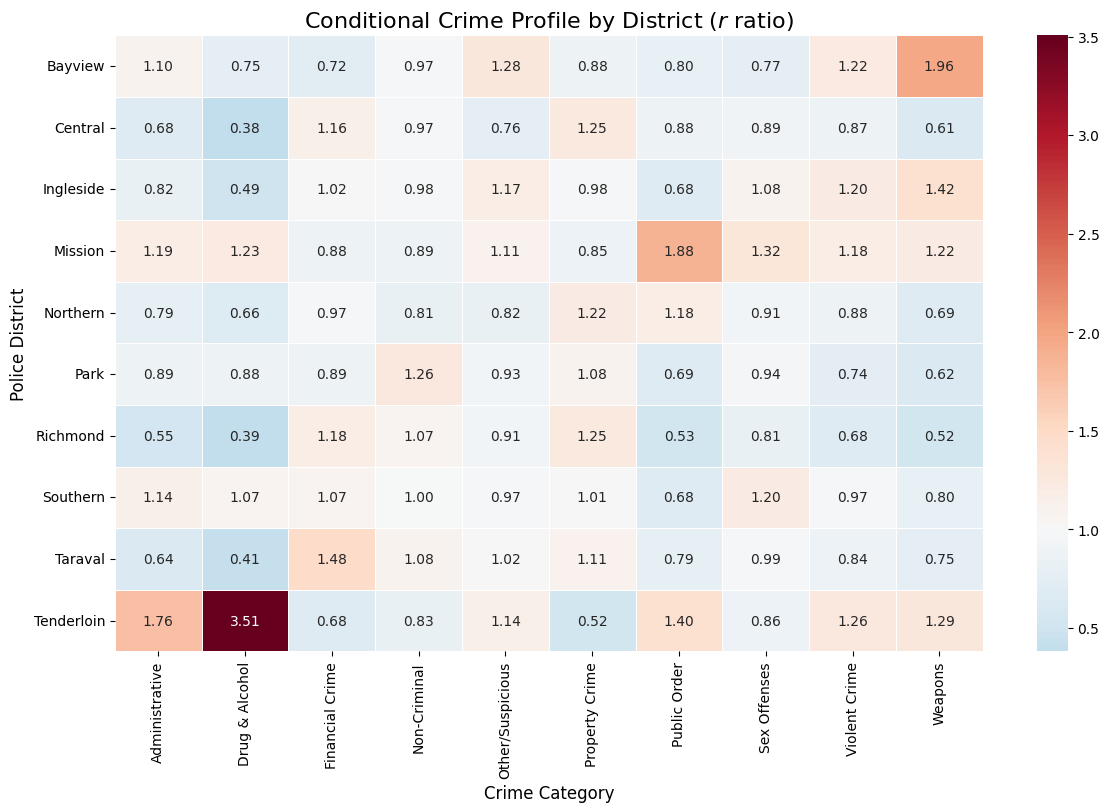

In [47]:
plt.figure(figsize=(14, 8))

# We use a log scale or center the colormap at 1.0
# Values > 1 are "more than average", values < 1 are "less than average"
sns.heatmap(crime_profile_drop_outsf, 
            annot=True, 
            fmt=".2f", 
            cmap='RdBu_r', 
            center=1.0,
            linewidths=.5)

plt.title('Conditional Crime Profile by District ($r$ ratio)', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Police District', fontsize=12)
plt.show()

This heatmap visualizes the Conditional Crime Profile by district using the r ratio. An r ratio greater than 1.00 (red tones) indicates a higher concentration of a specific crime type in that district relative to the city average, while a ratio below 1.00 (blue tones) indicates a lower concentration.

### Key Outliers
| District | Crime Type | Ratio | Context |
|----------|-----------|-------|---------|
| **Tenderloin** | Drug Offense | 3.52 | Over 3× city average—severe drug concentration |
| **Bayview** | Weapons | 1.96 | Nearly double the expected average of Weapons-related incidents |
| **Mission** | Public Order | 1.88 | Higher rates of disorderly conduct, prostitution, loitering |


Additional Insights:
- **Financial Crime**: Taraval (r=1.48) and Richmond (r=1.18) show the highest relative concentrations of financial crimes, which aligns with areas that typically see more identity theft and fraud reports rather than street-level crime.
- **Administrative & Violent Crime** - Tenderloin also leads in terms of **Violent Crime** and **Administrative Crime**. However, Bayview is not far behind with r ration at **1.22**. 
- **Property Crime** - evenly represented across all neighbourhoods, though **Central** (1.25), **Richmond** (1.25) and **Northern** (1.22) are slightly in the lead before other districts.

### Safe cities and crime capitals

Additionally, based on the data from the heatmap we will calculate average "safety index" for each district - we have mutliple districts such as Northern, Ingleside, Park  and Richmond that appear "bluer" than the others.

C:\Users\sofia\AppData\Local\Temp\ipykernel_26048\3520756478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=safety_index.values, y=safety_index.index, palette=colors)


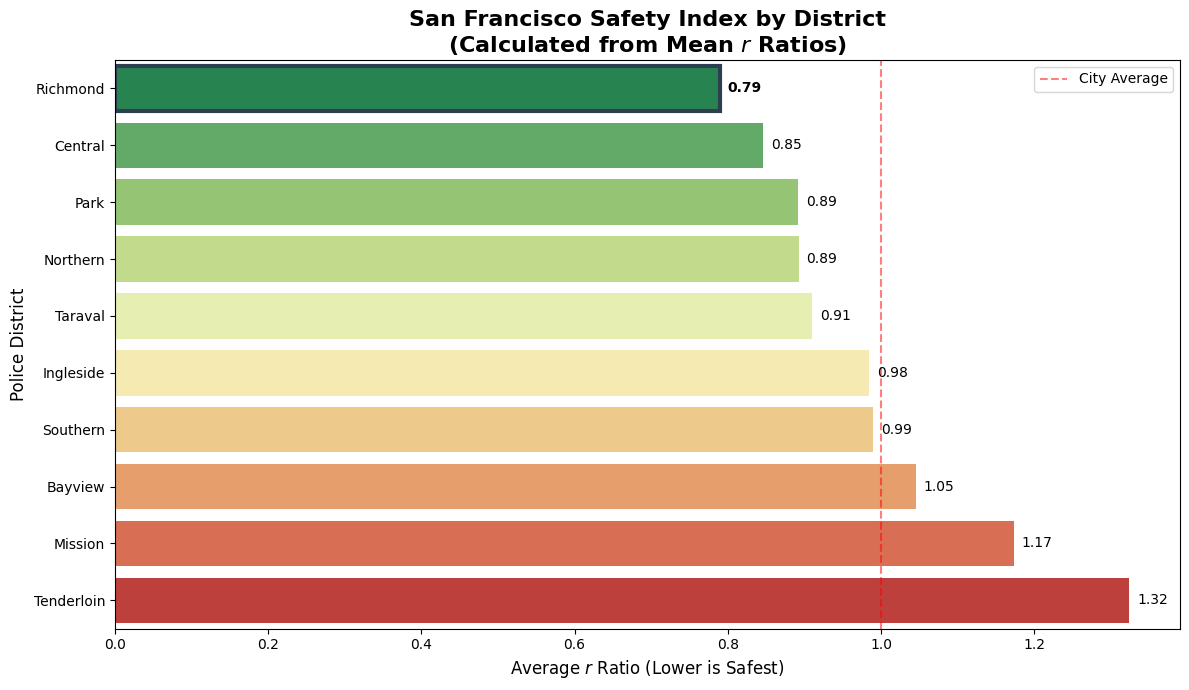

Safety Ranking (Safest to Least Safe):
Police District
Richmond      0.789371
Central       0.846032
Park          0.892112
Northern      0.892897
Taraval       0.910330
Ingleside     0.984914
Southern      0.989703
Bayview       1.045402
Mission       1.173394
Tenderloin    1.323988


In [48]:
# We calculate the mean for each row (district)
safety_index = crime_profile_drop_outsf.mean(axis=1).sort_values()

# 2. Set up the plotting environment
plt.figure(figsize=(12, 7))
colors = sns.color_palette("RdYlGn_r", len(safety_index)) # Green for low r, Red for high r

# 3. Create the bar chart
ax = sns.barplot(x=safety_index.values, y=safety_index.index, palette=colors)

# 4. Specifically highlight Richmond to prove the point
for i, district in enumerate(safety_index.index):
    if district == 'Richmond':
        ax.patches[i].set_edgecolor('#2c3e50')
        ax.patches[i].set_linewidth(3)

# 5. Formatting
plt.title('San Francisco Safety Index by District\n(Calculated from Mean $r$ Ratios)', fontsize=16, fontweight='bold')
plt.xlabel('Average $r$ Ratio (Lower is Safest)', fontsize=12)
plt.ylabel('Police District', fontsize=12)
plt.axvline(1.0, color='red', linestyle='--', alpha=0.5, label='City Average')
plt.legend()

# Add value labels for precision
for i, v in enumerate(safety_index.values):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontweight='bold' if safety_index.index[i] == 'Richmond' else 'normal')

plt.tight_layout()
plt.show()

# 6. Quick Printout for your report
print("Safety Ranking (Safest to Least Safe):")
print(safety_index.to_string())

Based on this data we can safely conclude that **Richmond** is the safest district - it consistently maintains low concentrations across nearly all categories, most notably in **Drug & Alcohol** (0.39), **Public Order** (0.53), and **Administrative** (0.55) offenses. <br>
The opposite can be said about **Tenderloin** - which we will look into in the next sub-section.

> * Pick **one district** whose profile stands out to you. Describe the pattern and offer an explanation for why that district looks the way it does. Are there geographic, demographic, or other factors that might explain it?

The **Tenderloin district** stands out as more dangerous than the others. We can see it has an absolute rampant problem with **Drug & Alcohol abuse**.

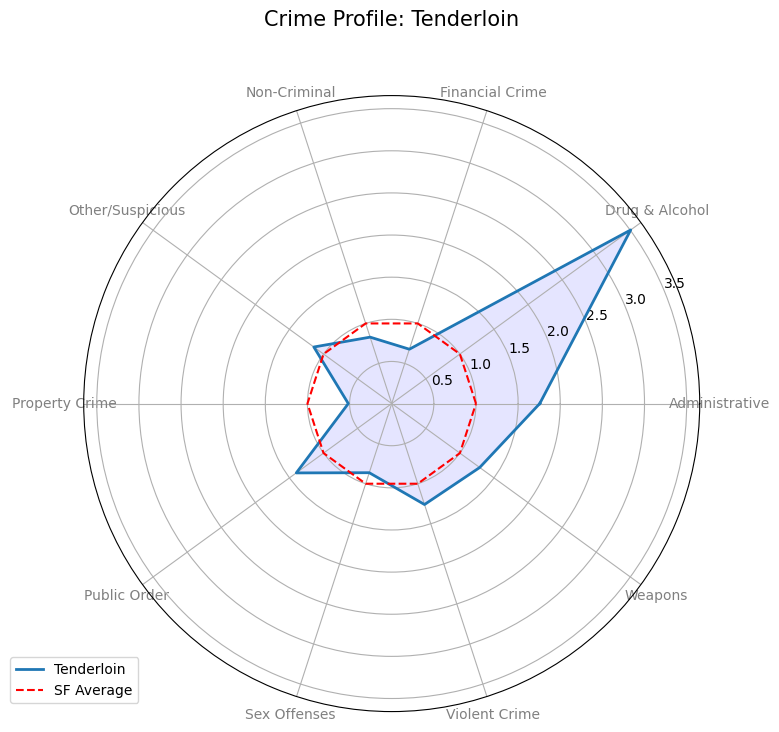

In [49]:
from math import pi

def plot_district_fingerprint(district_name, data):
    categories = list(data.columns)
    N = len(categories)
    
    # What will be the angle of each axis in the plot?
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    
    # The values for the specific district
    values = data.loc[district_name].values.flatten().tolist()
    values += values[:1]
    
    # Plot data
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=district_name)
    ax.fill(angles, values, 'b', alpha=0.1)
    
    # Add a circular line at r=1 (The City Average)
    ax.plot(angles, [1.0] * (N + 1), color='red', linestyle='--', label='SF Average')
    
    plt.title(f'Crime Profile: {district_name}', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Example usage for one district
plt.figure(figsize=(8, 8))
plot_district_fingerprint('Tenderloin', crime_profile_drop_outsf)
plt.show()

In the fingerprint visualization above we can see the San Francisco average noted with the dotted red circle. <br>
The Tenderloin district exhibits dramatic over-representation of drug and substance-abuse offenses. This aligns with extensive reporting on the neighborhood's battles with open-air drug markets and the [ongoing fentanyl crisis](https://www.sfchronicle.com/projects/san-francisco-drug-overdose-deaths/). High rates of homelessness, trafficking, and public health emergencies converge to create this distinct crime profile.
Besides that, Tenderloin district also slightly "outperforms" the SF average in categories of **Public Order** (likely related to the drug abuse charges), **Other/Suspicious** crimes, **Weapons** related charges and **Administrative** crime.

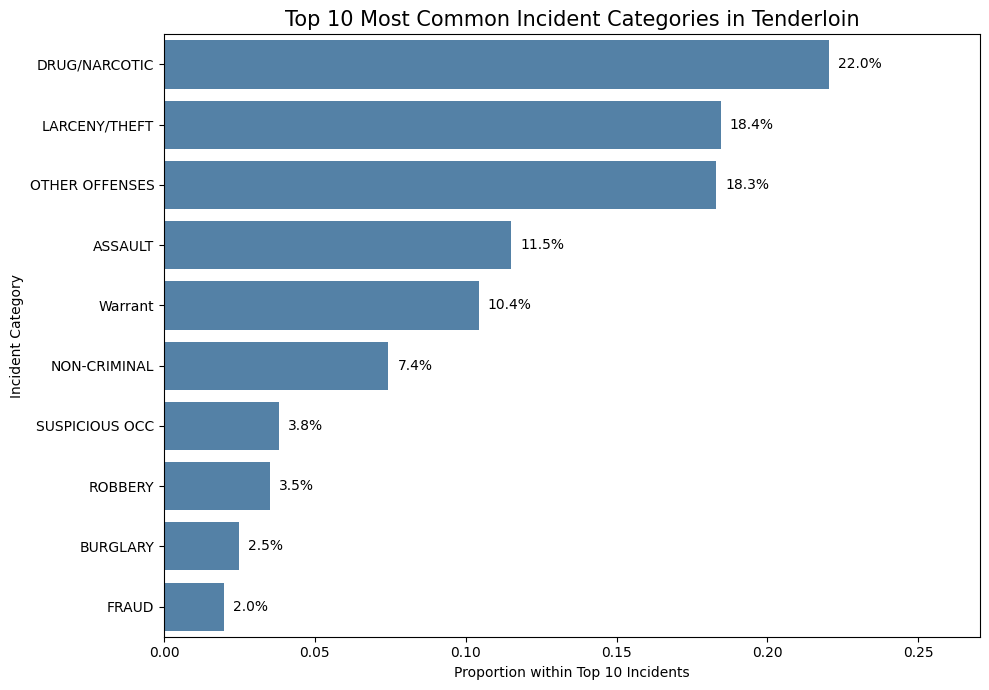

In [ ]:
import re

# 1. Filter and standardize casing immediately
tender = data[data['Police District'] == 'Tenderloin'].copy()
tender['Incident Category'] = tender['Incident Category'].str.upper().str.strip()

# 2. Apply masks for specific merges
# Merge Larceny/Theft
mask_larceny = tender['Incident Category'].str.contains('LARCENY|THEFT', case=False, na=False)
tender.loc[mask_larceny, 'Incident Category'] = 'LARCENY/THEFT'

# Merge Assaults (This handles the "ASSAULT" vs "Assault" split)
mask_assault = tender['Incident Category'].str.contains('ASSAULT', case=False, na=False)
tender.loc[mask_assault, 'Incident Category'] = 'ASSAULT'

# Merge Drug/Narcotics
mask_drug = tender['Incident Category'].str.contains('DRUG|NARCOTIC', case=False, na=False)
tender.loc[mask_drug, 'Incident Category'] = 'DRUG/NARCOTIC'

# Merge "Other" categories 
mask_other = tender['Incident Category'].str.contains('OTHER|MISCELLANEOUS', case=False, na=False)
tender.loc[mask_other, 'Incident Category'] = 'OTHER OFFENSES'

# Merge "Warrant" categories
mask_warrant = tender['Incident Category'].str.contains('Warrant', case=False, na=False)
tender.loc[mask_warrant, 'Incident Category'] = 'Warrant' 

# 3. Get top 10 most common Incident Categories
top10_counts = tender['Incident Category'].value_counts().head(10)

# 4. Convert to proportions
top10_props = top10_counts / top10_counts.sum()

# --- Plotting ---
plt.figure(figsize=(10, 7))
bar = sns.barplot(x=top10_props.values, y=top10_props.index, color='steelblue')

plt.title('Top 10 Most Common Incident Categories in Tenderloin', fontsize=15)
plt.xlabel('Proportion within Top 10 Incidents')
plt.ylabel('Incident Category')

# Annotate percentages
for i, v in enumerate(top10_props.values):
    plt.text(v + 0.003, i, f"{v:.1%}", va='center')

plt.xlim(0, top10_props.max() + 0.05)
plt.tight_layout()
plt.show()


### Tenderloin Conclusion:

*Note: To ensure data integrity across the 2018 reporting transition, we consolidated overlapping categories (e.g., merging uppercase WARRANTS with title-case Warrants) to prevent artificial splitting of the dataset.*
- **Primary Crime Drivers**: **Drug/Narcotic** offenses represent the largest share of incidents at **22%,** followed by **Larceny/Theft** at **18.4%**. While Larceny is the leading incident category across San Francisco as a whole, the Tenderloin is distinct for its significantly higher concentration of drug-related charges.
- **Administrative Correlation**: The high frequency of **Warrant-related incidents - (10.4%)** likely correlates with the volume of narcotics enforcement. This suggests that a substantial portion of **administrative** crimes we have seen in the fingerprint and heatmap stems from searches and existing warrants related to the drug problem within the district.

---

---


# Assignment 1.3: Visualizing Distributions
### Part A — Jitter plot

Pick one of your Personal Focus Crimes and a suitable time interval (somewhere between a month and 6 months, depending on how common the crime is). Create a jitter plot of the incident times during a single hour (e.g. 13:00–14:00): let time run along the 
-axis and add vertical jitter.
What does the jitter plot reveal about how times are recorded in the dataset? Are incidents clustered at certain minutes (on the hour, half hour, etc.)? What does this tell you about the precision of the data?

Total incidents for Property Crime (June-July 2009): 12351


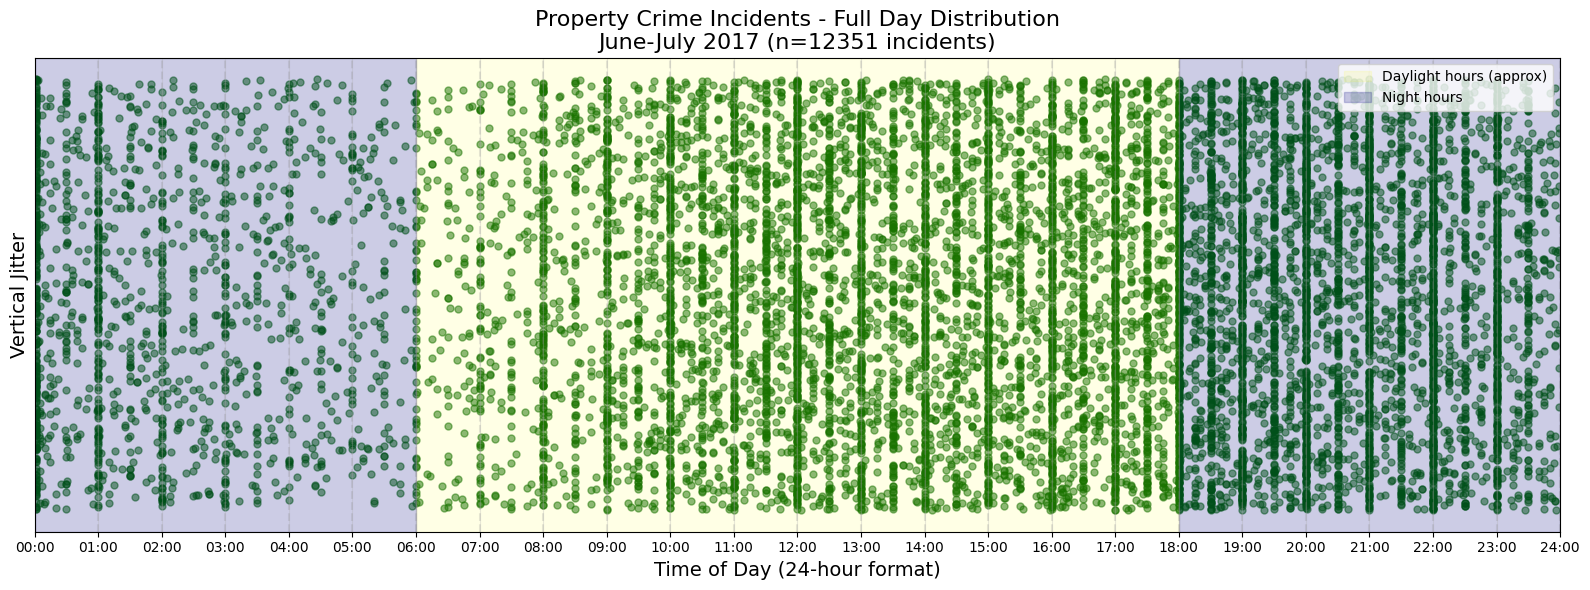


--- Incident Distribution by Time of Day ---
Late Night (00:00-03:59): 1217 incidents (9.9%)
Early Morning (04:00-07:59): 629 incidents (5.1%)
Morning (08:00-11:59): 1939 incidents (15.7%)
Afternoon (12:00-15:59): 2559 incidents (20.7%)
Evening (16:00-19:59): 3159 incidents (25.6%)
Night (20:00-23:59): 2848 incidents (23.1%)

Peak hour: 18:00-19:00 (902 incidents)
Quietest hour: 5:00-6:00 (133 incidents)


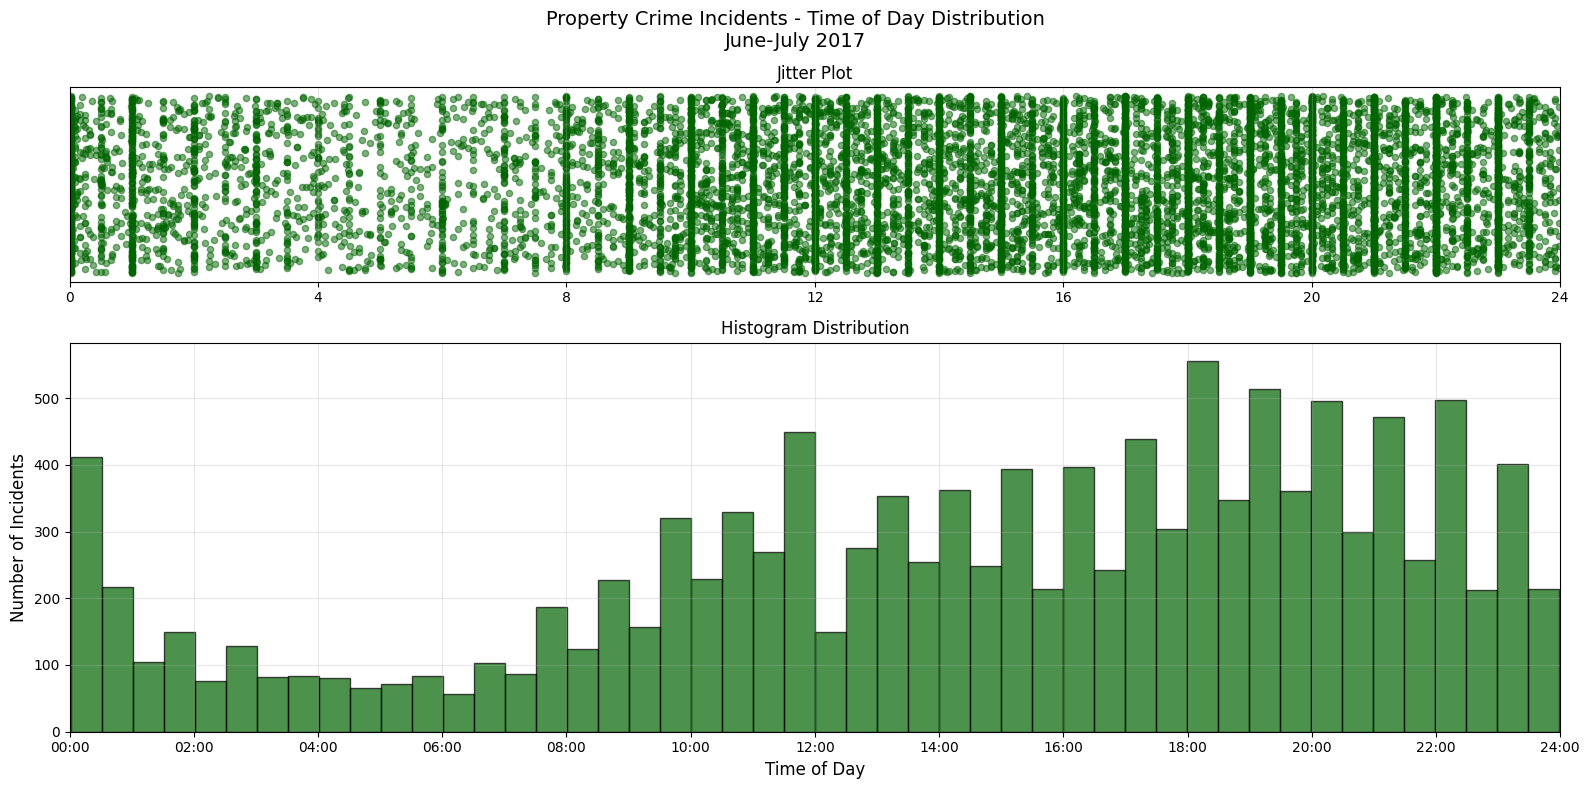

In [10]:
# Load the data
data = pd.read_csv("../data/clean-data/sf_clean_data_grouped.csv")

# Convert Incident Datetime to datetime
data['Incident Datetime'] = pd.to_datetime(data['Incident Datetime'])

# Filter
focus_crime = "Property Crime"
period_data = data[
    (data['Focus Group'] == focus_crime) & 
    (data['Incident Datetime'].dt.year == 2017) & 
    (data['Incident Datetime'].dt.month.isin([6, 7]))  
]

print(f"Total incidents for {focus_crime} (June-July 2009): {len(period_data)}")

if len(period_data) == 0:
    print(f"No data found! Available Focus Groups: {data['Focus Group'].unique()}")
else:
    # Extract time of day as fraction of day (0 to 24 hours)
    time_of_day = (
        period_data['Incident Datetime'].dt.hour + 
        period_data['Incident Datetime'].dt.minute / 60 + 
        period_data['Incident Datetime'].dt.second / 3600
    )
    
    # Add vertical jitter
    jitter = np.random.uniform(-0.3, 0.3, size=len(period_data))
    
    # Create the plot
    plt.figure(figsize=(16, 6))
    plt.scatter(time_of_day, jitter, alpha=0.5, s=25, color='darkgreen')
    
    # Customize the plot
    plt.title(f'{focus_crime} Incidents - Full Day Distribution\nJune-July 2017 (n={len(period_data)} incidents)', 
              fontsize=16)
    plt.xlabel('Time of Day (24-hour format)', fontsize=14)
    plt.ylabel('Vertical Jitter', fontsize=14)
    plt.yticks([])  # Remove y-axis ticks
    
# Format x-axis to show every hour
    plt.xticks(np.arange(0, 25, 1), 
            [f'{hour:02d}:00' for hour in range(0, 25)])
    
    # Add vertical grid lines at each hour
    for hour in range(0, 25):
        plt.axvline(x=hour, color='gray', linestyle='--', alpha=0.2)
    
    # Add background shading for day/night (rough approximation)
    plt.axvspan(6, 18, alpha=0.1, color='yellow', label='Daylight hours (approx)')
    plt.axvspan(0, 6, alpha=0.2, color='navy', label='Night hours')
    plt.axvspan(18, 24, alpha=0.2, color='navy')
    
    plt.xlim(0, 24)
    plt.grid(True, alpha=0.3, axis='x')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # Statistical summary by time blocks
    print("\n--- Incident Distribution by Time of Day ---")
    
    # Define time blocks
    time_blocks = {
        'Late Night (00:00-03:59)': (0, 4),
        'Early Morning (04:00-07:59)': (4, 8),
        'Morning (08:00-11:59)': (8, 12),
        'Afternoon (12:00-15:59)': (12, 16),
        'Evening (16:00-19:59)': (16, 20),
        'Night (20:00-23:59)': (20, 24)
    }
    
    for block_name, (start, end) in time_blocks.items():
        count = len(period_data[(time_of_day >= start) & (time_of_day < end)])
        percentage = (count / len(period_data)) * 100
        print(f"{block_name}: {count} incidents ({percentage:.1f}%)")
    
    # Find peak hours
    hour_counts = period_data['Incident Datetime'].dt.hour.value_counts().sort_index()
    peak_hour = hour_counts.idxmax()
    peak_count = hour_counts.max()
    
    print(f"\nPeak hour: {peak_hour}:00-{peak_hour+1}:00 ({peak_count} incidents)")
    print(f"Quietest hour: {hour_counts.idxmin()}:00-{hour_counts.idxmin()+1}:00 ({hour_counts.min()} incidents)")
    
    # Optional: Create histogram to show distribution more clearly
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), gridspec_kw={'height_ratios': [1, 2]})
    
    # Top plot: Jitter plot
    ax1.scatter(time_of_day, np.random.uniform(-0.2, 0.2, size=len(period_data)), 
                alpha=0.5, s=20, color='darkgreen')
    ax1.set_title('Jitter Plot', fontsize=12)
    ax1.set_yticks([])
    ax1.set_xlim(0, 24)
    ax1.set_xticks(np.arange(0, 25, 4))
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Bottom plot: Histogram
    ax2.hist(time_of_day, bins=48, alpha=0.7, color='darkgreen', edgecolor='black')
    ax2.set_title('Histogram Distribution', fontsize=12)
    ax2.set_xlabel('Time of Day', fontsize=12)
    ax2.set_ylabel('Number of Incidents', fontsize=12)
    ax2.set_xlim(0, 24)
    ax2.set_xticks(np.arange(0, 25, 2))
    ax2.set_xticklabels([f'{hour:02d}:00' for hour in range(0, 25, 2)])
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle(f'{focus_crime} Incidents - Time of Day Distribution\nJune-July 2017', fontsize=14)
    plt.tight_layout()
    plt.show()

Based on this plot, the most of the Property Crimes in 2017, where their incidence was the highest, cluster around the time window from **18:00 to 19:00**. The most busy hours are during **daytime**, the incidence decreases **from midnight until 8:00**.<br> The general pattern we can follow is that more cases are registered on hour that can suggest that when manually entering data, police department rounds up to the nearest hour. This can be explained by people reporting do not know the exact time when someone was trespassing, stolen their car or other, therefore providing a time interval.

### Part B — Probability plot

Using the same geographic data from Part B, create a probability plot (QQ plot) for the latitude distribution of each of your two crime types. (scipy.stats.probplot is your friend here.)
What reference distribution are you comparing against? What would it mean if the points fell exactly on the straight line? Where does the distribution deviate from normal, and what does that deviation tell you about the geography of crime in SF?

Property Crime: 1278009 latitude points
Violent Crime: 308461 latitude points


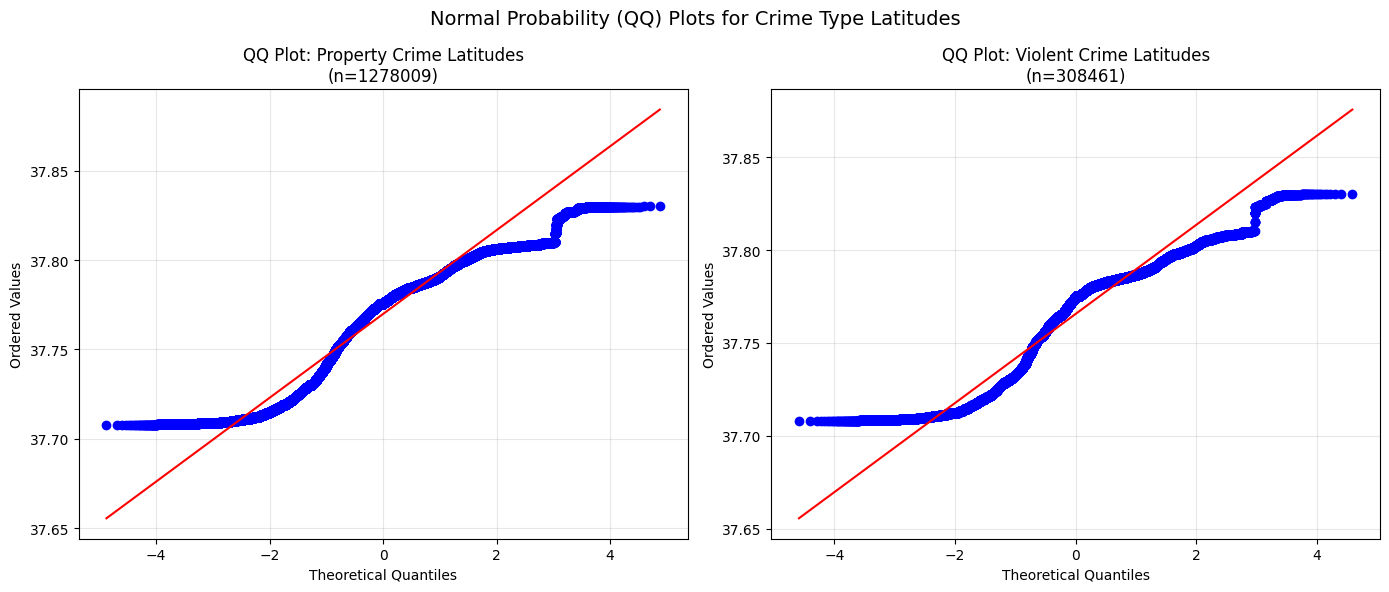

In [7]:
# Choose two crime types to compare (replace with your specific types)
crime_type_1 = "Property Crime"
crime_type_2 = "Violent Crime"

data = data[(data['Latitude'] < 90)].copy()

# Filter latitude data for each crime type (remove any null values)
latitudes_1 = data[data['Focus Group'] == crime_type_1]['Latitude'].dropna()
latitudes_2 = data[data['Focus Group'] == crime_type_2]['Latitude'].dropna()

print(f"{crime_type_1}: {len(latitudes_1)} latitude points")
print(f"{crime_type_2}: {len(latitudes_2)} latitude points")

# Create QQ plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# QQ plot for crime type 1
stats.probplot(latitudes_1, dist="norm", plot=axes[0])
axes[0].set_title(f'QQ Plot: {crime_type_1} Latitudes\n(n={len(latitudes_1)})', fontsize=12)
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Ordered Values')
axes[0].grid(True, alpha=0.3)

# QQ plot for crime type 2
stats.probplot(latitudes_2, dist="norm", plot=axes[1])
axes[1].set_title(f'QQ Plot: {crime_type_2} Latitudes\n(n={len(latitudes_2)})', fontsize=12)
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Normal Probability (QQ) Plots for Crime Type Latitudes', fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
print("Latitude min:", data['Latitude'].min())
print("Latitude max:", data['Latitude'].max())

Latitude min: 37.70784759521
Latitude max: 37.83005523682


Only lattitudes under 90 degrees were kept for this analysis.
We are comparing the rates to the normal distribution. We clearly see, that the crime locations are not randomly distributed by the S shape of the plot, meaning there are areas where Property or Violent Crime occures more often than in others. If the point were exactly on the straight line, theis would mean that the incidence of the crime is the same in all of the neighbourhoods in San Francisco. We have shown on other focus groups in the previous part of the exercise that this is not true.

### Part C — Box plots of time-of-day

For each of your Personal Focus Crimes, extract the time-of-day of every incident.
Create box plots showing the time-of-day distribution for all your Personal Focus Crimes side by side.
What patterns do you see? Are there crimes that happen mostly at night? Mostly during business hours? For crimes that peak late at night, does the box plot handle the wrap-around at midnight well? What goes wrong?
Above, feel free to use alternatives to box plots — violin plots, swarm plots, or raincloud plots — if you think they reveal more. If you do, briefly explain what the alternative shows that the box plot doesn't.

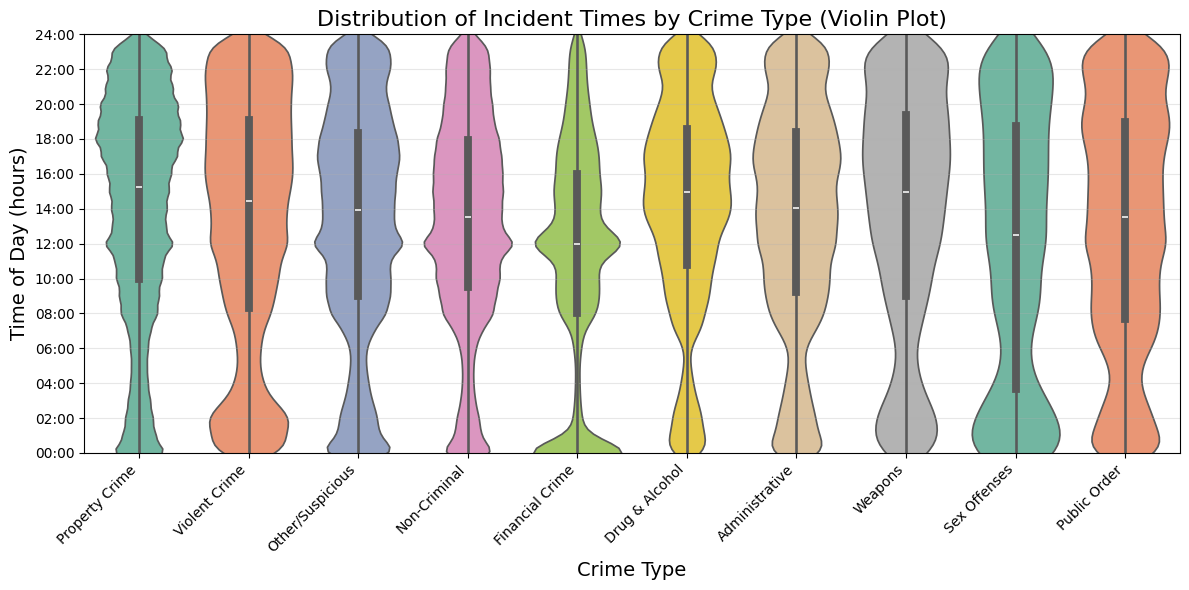

In [16]:
focus_crimes = data['Focus Group'].unique()   # or specify a list like ['Property Crime', 'Violent Crime']

data['Time of Day'] = (
    data['Incident Datetime'].dt.hour + 
    data['Incident Datetime'].dt.minute / 60 + 
    data['Incident Datetime'].dt.second / 3600
)

focus_crimes = data['Focus Group'].unique()
plot_data = data[data['Focus Group'].isin(focus_crimes)].copy()

# Create side‑by‑side violin plots
plt.figure(figsize=(12, 6))  # slightly wider for readability
sns.violinplot(data=plot_data, x='Focus Group', y='Time of Day', palette='Set2', hue='Focus Group', legend=False)

# Beautify the plot
plt.title('Distribution of Incident Times by Crime Type (Violin Plot)', fontsize=16)
plt.xlabel('Crime Type', fontsize=14)
plt.ylabel('Time of Day (hours)', fontsize=14)

# Format y‑axis labels as clock times
yticks = np.arange(0, 25, 2)
plt.yticks(yticks, [f'{int(h):02d}:00' for h in yticks])
plt.ylim(0, 24)

plt.grid(True, alpha=0.3, axis='y')

# Rotate x‑axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


For this analysis we decided to use violin plots, as these comparing to box plots, reveal more from the data structure, in this case e.g. information about proportion of the incidents happening at a certain hour in relation to other parts of the day.
The plot that most of the crimes are happening from 7:00 to 2:00. We observe peaks around 12:00 for Property and Financial Crime, together with Non-Criminal and Other. For Property Crime the median is around 16:00, the reason can be that businesses are still open, people are away from their homes. Violent crime has a broad distribution during evening hours which can be explained by social life and no daylight. A similar pattern and explanation is observed for the weapons. Non-Criminal and Financial Crime follows daily bussiness hours, and the Group of Other/Suspicious has a bit of a broader pattern, explained by broad reported times of suspicious activity. Sex Offenses and Public Order crimes span a long time during the day, often related to the darkness. 

----

---

## Assignment 1.4: Spatial Power Law

Is crime spread evenly across San Francisco, or is it concentrated in a small number of hotspots? Let's find out.

Use your **most common Personal Focus Crime** (by total incident count) for this exercise.

> * **Step 1**: Divide San Francisco into a grid of approximately $100\text{m} \times 100\text{m}$ cells using latitude and longitude. It is fine to ignore that the Earth isn't flat — the approximation is good enough for this purpose.
>     * **Hint**: `np.histogram2d` works well here. Focus on points within the SF peninsula; filter out geographic outliers.
> * **Step 2**: Count the number of incidents of your chosen crime in each grid cell (use all years of data).
> * **Step 3**: Tally the distribution. Count how many cells have exactly $k$ incidents — call this $N(k)$ — for $k = 0, 1, 2, \ldots$ up to the maximum.
> * **Step 4**: Plot $(k+1)$ vs $N(k)$ on **linear axes**.
> * **Step 5**: Plot $(k+1)$ vs $N(k)$ on **loglog axes**.

### Plotting

Analyzing most common crime: Property Crime


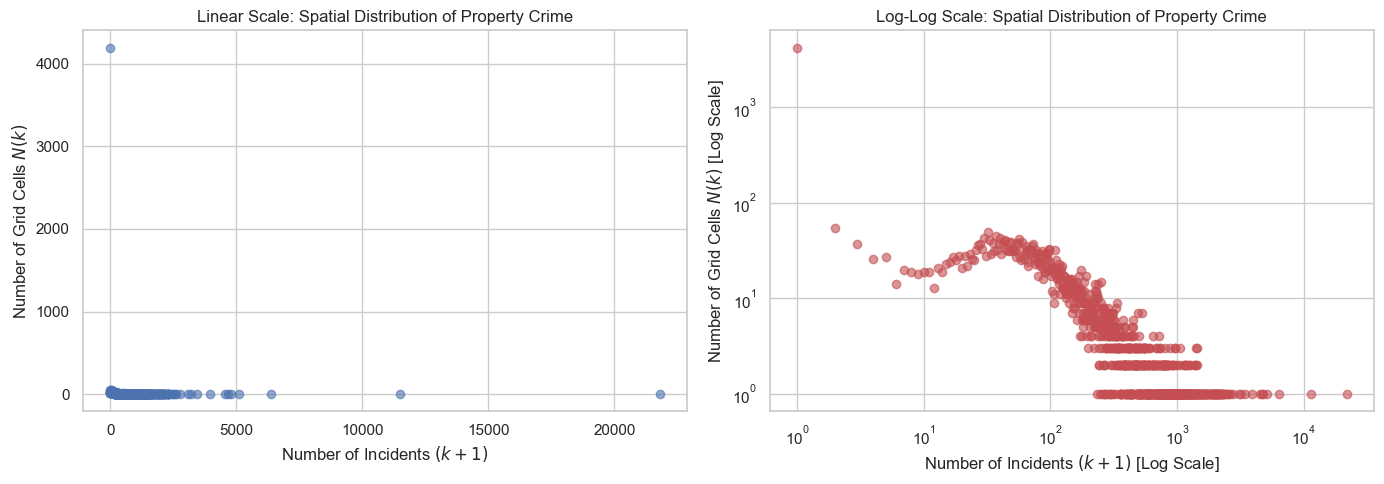

In [17]:
data = data.dropna(subset=['Latitude', 'Longitude'])
# Find the most common incident category
top_crime_name = data['Focus Group'].value_counts().idxmax()
print(f"Analyzing most common crime: {top_crime_name}")

# Filter for the top crime
df_top = data[data['Focus Group'] == top_crime_name]

# --- Step 1 & 2: Grid and Count ---
# Filter for the SF Peninsula to avoid geographic outliers
# Approximate SF Bounds: Lat [37.70, 37.82], Lon [-122.52, -122.35]
sf_mask = (df_top['Latitude'] > 37.70) & (df_top['Latitude'] < 37.82) & \
          (df_top['Longitude'] > -122.52) & (df_top['Longitude'] < -122.35)
df_filtered = df_top[sf_mask]

# Create ~100m bins (110 bins for ~11km span)
counts, xedges, yedges = np.histogram2d(
    df_filtered['Longitude'], 
    df_filtered['Latitude'], 
    bins=[100, 100]
)

# Flatten the 2D array to get a 1D list of incident counts per cell
cell_counts = counts.flatten()

# --- Step 3: Tally the Distribution N(k) ---
k_values, n_k = np.unique(cell_counts, return_counts=True)

# --- Plotting ---
sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Linear Plot (Step 4)
ax1.plot(k_values + 1, n_k, marker='o', linestyle='none', alpha=0.6, color='b')
ax1.set_title(f"Linear Scale: Spatial Distribution of {top_crime_name.title()}")
ax1.set_xlabel("Number of Incidents $(k+1)$")
ax1.set_ylabel("Number of Grid Cells $N(k)$")

# Log-Log Plot (Step 5)
ax2.loglog(k_values + 1, n_k, marker='o', linestyle='none', alpha=0.6, color='r')
ax2.set_title(f"Log-Log Scale: Spatial Distribution of {top_crime_name.title()}")
ax2.set_xlabel("Number of Incidents $(k+1)$ [Log Scale]")
ax2.set_ylabel("Number of Grid Cells $N(k)$ [Log Scale]")

plt.tight_layout()
plt.show()

### Analysis
> * **Step 6**: Does your crime follow a power-law spatial distribution? How can you tell from the loglog plot?


In a log-log plot, the power-law is a straight line - which isn't the case for us exactly. We can see there's a slight spike between $k = 10^{1}$ and $10^{2}$. However, there is still the wide tail which proves that a few "super-hotspots" account for a massive disproportion of the total crime. From our previous analyses, it may be safe to assume districts such as **Tenderloin** and **Bayview** would be the ones accumulating these hotspots.

> * **Step 7**: If crime is spatially concentrated in a small number of cells, what does that imply for how we interpret neighborhood-level crime statistics? Does the "average block" tell you anything useful?


In short, the **power-law distribution proves that we can't average crime across the entire San Francisco**. There is no such thing as an "average block" - crime isn't evenly spread out through the entire city, it's centered on hotspots. In case of theft it could be equally tourist landmarks, places where a lot of people congregate at the same time (train/bus stations) or shops. Because the distribution is highly skewed, the mean crime rate is not representative of a typical resident's experience.

#### Analysis regarding The Outlier
There  is one suspicious outlier in the far left corner that seems to have 0 levels of crime. So let's find it! We'll use numpy's unravel_index to recover the coordinates, plant them on a map and finally find the real world position.

--- Top Spatial Outlier Found ---
Location: 37.77568, -122.40286
Total Incidents in this 100m block: 21799


c:\Users\sofia\anaconda3\envs\sdv-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


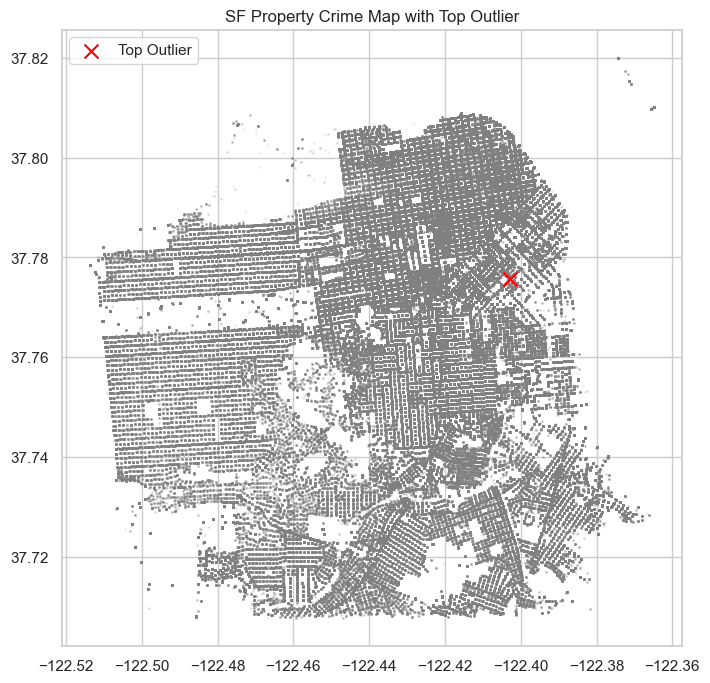

In [18]:
# 1. Find the index of the cell with the highest count
max_idx = np.unravel_index(np.argmax(counts, axis=None), counts.shape)

# 2. Convert that grid index back into Lat/Lon coordinates 
# We take the average of the edges to get the center of the 100m square
lon_outlier = (xedges[max_idx[0]] + xedges[max_idx[0] + 1]) / 2
lat_outlier = (yedges[max_idx[1]] + yedges[max_idx[1] + 1]) / 2
max_incidents = counts[max_idx]

print(f"--- Top Spatial Outlier Found ---")
print(f"Location: {lat_outlier:.5f}, {lon_outlier:.5f}")
print(f"Total Incidents in this 100m block: {int(max_incidents)}")

# 3. Quick Plot to see it on a scatter map
plt.figure(figsize=(8, 8))
plt.scatter(df_filtered['Longitude'], df_filtered['Latitude'], s=1, alpha=0.1, color='gray')
plt.scatter(lon_outlier, lat_outlier, color='red', s=100, marker='x', label='Top Outlier')
plt.title(f"SF {top_crime_name.title()} Map with Top Outlier")
plt.legend()
plt.show()

If we enter these coordinates to Google Maps we are transported to Bryant Street - right next to **San Francisco Police Officer's Association** (a non-profit organization for past and current police officers in San Francisco), which is next to **Hall of Justice** and of course - across the street from **San Francisco police department**. It makes sense this outlier would be a quiet spot. 

----

---

# Assignment 1.5: Regression and Correlation
Which of your Personal Focus Crimes share the most similar weekly rhythm — and which are completely out of sync?


Select at least 4 of your Personal Focus Crimes for this exercise. More is fine - if you want to be closer to the actual weekly exercise.

> * **Scatterplot matrix**: Create a grid of pairwise scatterplots — one panel per pair of crime types, with one crime on each axis and each of the 168 hours as a point. Label each panel clearly with the two crime types being compared.
>
> * **Linear regression**: Using the closed-form equations from Week 4 (not a library), fit a regression line $y = ax + b$ to each pair and add it to the relevant panel:
>   $$a = \frac{\sum_i x_i y_i - N\langle x\rangle\langle y\rangle}{\sum_i x_i^2 - N\langle x\rangle^2}, \qquad b = \langle y \rangle - a\langle x \rangle$$
>
> * **$R^2$**: Compute $R^2$ for each pair and display the value on each panel. 
>
> * Looking at your results: which pair of crimes is **most correlated**? Which is **least correlated**? Does the answer match your intuition? Why might two crime types share a weekly rhythm — or not?

**Chosen categories:** <br><br>
> For this analysis we have chosen 
>  - **Violent Crime** - We hypothesize that violent incidents will show a broad temporal correlation with most other categories, serving as a key indicator for overall district activity. Selected as primary baseline.
>  - **Sex Offenses** - We anticipate a strong correlation with **Violent Crime** due to the high-stakes nature of these incidents. Additionally, we aim to test the hypothesis that these offenses may be linked to **Drug & Alcohol** abuse.
> - **Drug & Alcohol** - Similar to violent crime, this category offers a high probability of intersection with multiple groups. We expect to see significant correlation with both violent offenses and general public order disruptions.
> - **Public Order** - This group (ranging from prostitution to loitering) is expected to correlate highly with **Sex Offenses** and **Drug & Alcohol** abuse, as these behaviors often occur within the same nightlife or street-level ecosystems.
> - **Other/Suspicious** - Acting as our catch-all group, we want to see if it will correlate with other, more severe criminal activity.

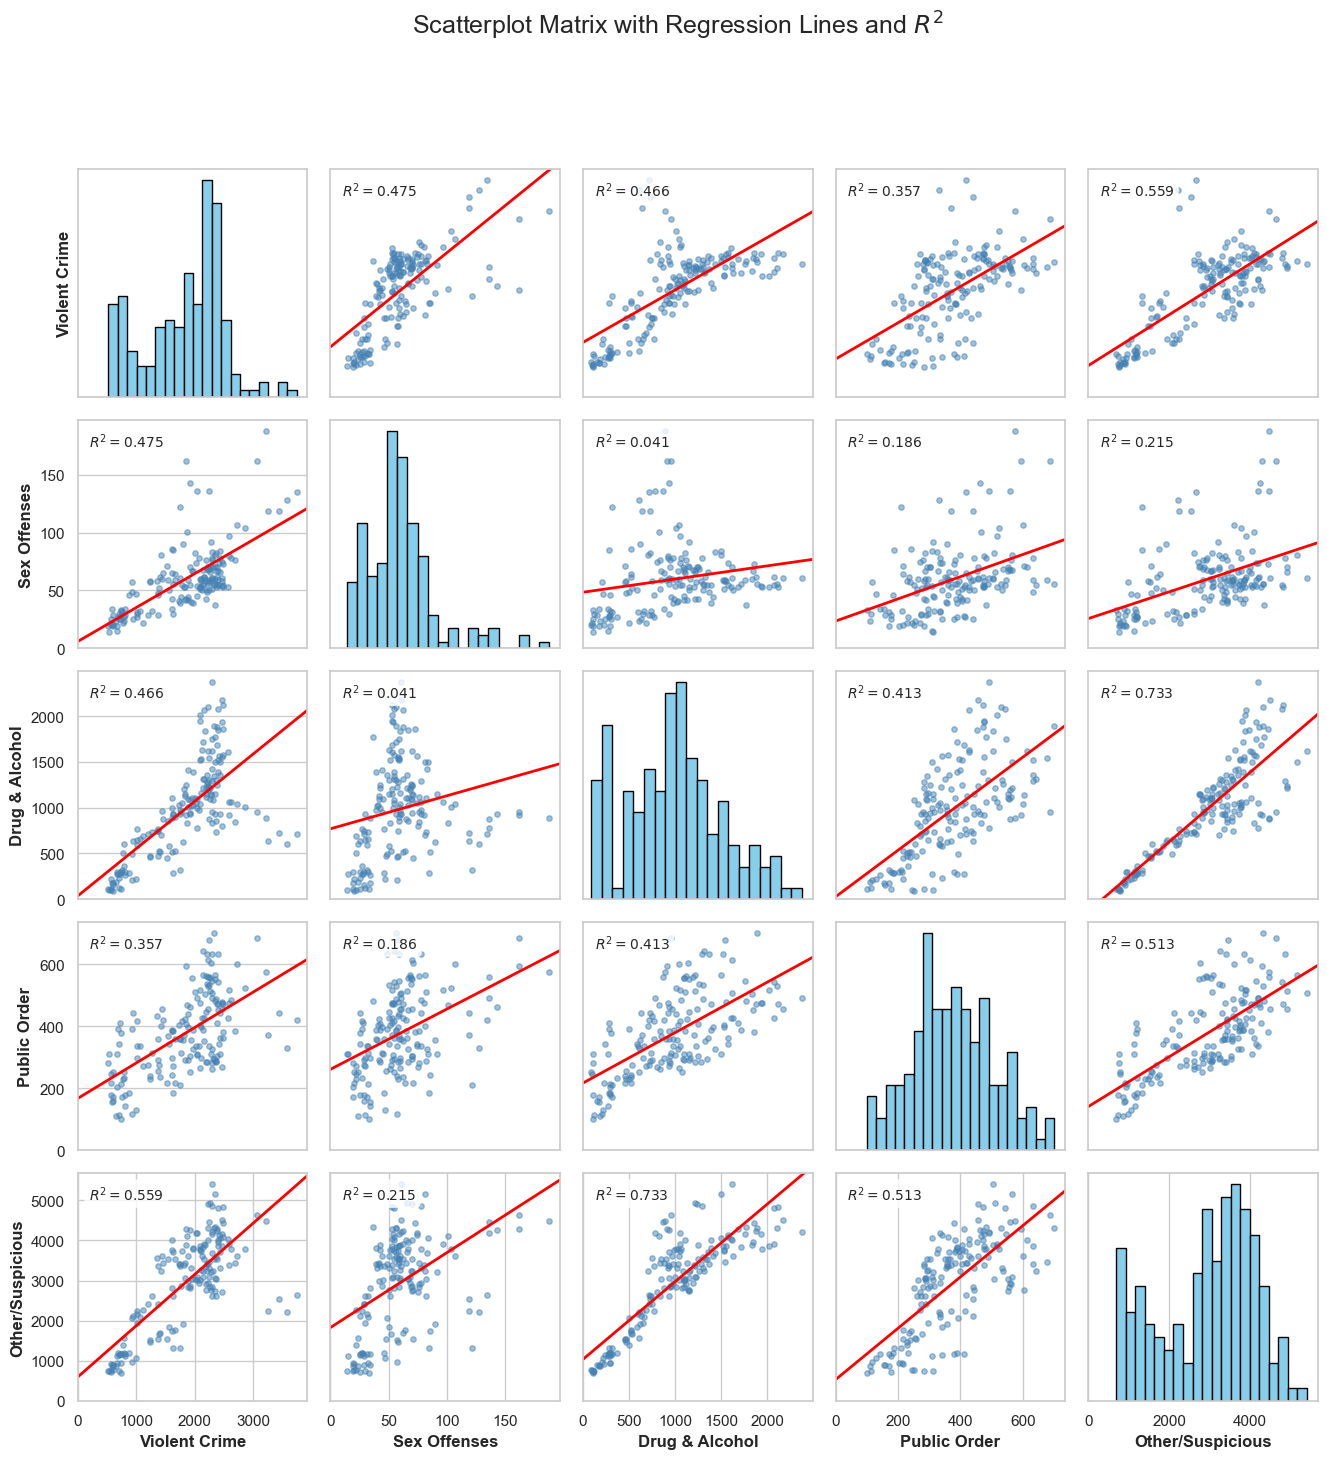

In [ ]:
# 1. Pre-process Time Data
data['Incident Datetime'] = pd.to_datetime(data['Incident Datetime'])
data['day_of_week'] = data['Incident Datetime'].dt.dayofweek   # 0=Monday
data['hour'] = data['Incident Datetime'].dt.hour
data['hour_of_week'] = data['day_of_week'] * 24 + data['hour']

crime_types = ['Violent Crime', 'Sex Offenses', 'Drug & Alcohol', 'Public Order', 'Other/Suspicious']

# 2. Aggregate Counts
hour_range = np.arange(168)
crime_counts = pd.DataFrame(index=hour_range)

for crime in crime_types:
    # .str.strip() ensures we don't miss categories due to trailing spaces
    crime_data = data[data['Focus Group'].str.strip() == crime]
    counts = crime_data.groupby('hour_of_week').size()
    crime_counts[crime] = counts.reindex(hour_range, fill_value=0).values

# Calculate fixed axis limits for each crime type to keep the grid aligned
axis_limits = {}
for crime in crime_types:
    max_val = crime_counts[crime].max()
    axis_limits[crime] = (0, max_val * 1.05) # Add 5% padding for breathing room

# 3. Create Scatterplot Matrix
fig, axes = plt.subplots(len(crime_types), len(crime_types), figsize=(16, 16))

for i, crime_i in enumerate(crime_types):
    for j, crime_j in enumerate(crime_types):
        ax = axes[i, j]
        x = crime_counts[crime_j].values   # column crime_j on x-axis
        y = crime_counts[crime_i].values   # row crime_i on y-axis

        if i == j:
            # Diagonal: histogram
            ax.hist(x, bins=20, color='skyblue', edgecolor='black')
            ax.set_xlim(axis_limits[crime_j])
            ax.set_yticks([])  # Hide y-ticks on diagonal to avoid confusing frequency with counts
        else:
            # Off-diagonal: scatter plot
            ax.scatter(x, y, alpha=0.5, s=15, color='steelblue')
            ax.set_xlim(axis_limits[crime_j])
            ax.set_ylim(axis_limits[crime_i])

            # --- Linear regression using CLOSED-FORM EQUATIONS ---
            N = len(x)
            mean_x = np.mean(x)
            mean_y = np.mean(y)

            # Slope a = (Σxy - N * mean_x * mean_y) / (Σx² - N * mean_x²)
            numerator = np.sum(x * y) - N * mean_x * mean_y
            denominator = np.sum(x**2) - N * (mean_x**2)
            
            if denominator != 0:
                a = numerator / denominator
            else:
                a = 0   # constant x (unlikely)

            # Intercept b = mean_y - a * mean_x
            b = mean_y - a * mean_x

            # Plot regression line stretching across the x limit
            x_line = np.array([0, axis_limits[crime_j][1]])
            y_line = a * x_line + b
            ax.plot(x_line, y_line, color='red', linewidth=2)

            # --- Compute R² ---
            # Total sum of squares (around mean)
            ss_tot = np.sum((y - mean_y)**2)
            # Residual sum of squares
            ss_res = np.sum((y - (a*x + b))**2)
            
            if ss_tot != 0:
                r2 = 1 - ss_res / ss_tot
            else:
                r2 = np.nan

            # Display R² on the panel
            ax.text(0.05, 0.95, f'$R^2 = {r2:.3f}$',
                    transform=ax.transAxes, fontsize=10,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Set axis labels ONLY on the outer edges to create a clean matrix
        if i == len(crime_types) - 1:
            ax.set_xlabel(crime_j, fontsize=12, fontweight='bold')
        else:
            ax.set_xticks([]) # Clean up inner grid x-ticks

        if j == 0:
            ax.set_ylabel(crime_i, fontsize=12, fontweight='bold')
        elif i != j:
            ax.set_yticks([]) # Clean up inner grid y-ticks

plt.suptitle('Scatterplot Matrix with Regression Lines and $R^2$', y=0.98, fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.1) # Tightens the grid up beautifully
plt.show()

**Interesting insights**
- The correlation analysis of the chosen five Focus Groups showed that **Drug & Alcohol** are strongly correlated with **Other/Suspicious** activity with $R^{2} = 0.733$. The group **Other/Suspicious** is also highly correlated with all the other analysed crimes. This can be explained that the reported activity includes suicide.
- Next strong correlation can be seen between **Violent Crime** and **Sex Offenses**. Both of these crimes are happening mostly during night hours so this result was expected. The smallest correlation was found between **Drug & Alcohol** and **Sex Offenses**. This was expected as from the plots on Asignment 3, hours when these crimes happen vary a lot.
- The **Other/Suspicious** category exhibits moderate-to-high correlations with all analyzed crime types. This alignment makes sense considering this group includes a wide range of incidents—such as mental health crises, suicides, and general suspicious behavior—it would make sense it would interact with other crime occurences.

----

---

Contributions:

| Assignment | Responsible | Student number |
| :--- | :--- | :--- |
|  Data Cleaning  | Sofia Augustinova | s253859 |
|  Assignment 1.1 -  Temporal Overview | Zoja Palova | s225185 |
|  Assignment 1.2 - Crime Profiles by Police District  | Sofia Augustinova | s253859 |
|  Assignment 1.3 - Visualizing Distributions  | Zoja Palova | s225185 |
|  Assignment 1.4  - Spatial Power Law | Sofia Augustinova | s253859 |
|  Assignment 1.5 - Regression & Correlation  | Zoja Palova | s225185 |